In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('Bumble Google Play Reviews.csv')
df.shape

(398, 11)

In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,694d6035-edc9-477e-8c19-b2f87496a4b6,John Homes,https://play-lh.googleusercontent.com/a/ACg8oc...,Great for date beautiful woman,5,0,5.364.0,2024-04-14 00:36:13,Thanks for making our day! This is what we're ...,2024-04-14 06:45:14,5.364.0
1,be87b016-1eca-40d4-bc0b-f36f3a5496d5,Andrew Lewald,https://play-lh.googleusercontent.com/a-/ALV-U...,"Don't waste your money or your time, this app ...",1,44,5.364.0,2024-04-13 23:58:24,Thanks for reaching out. While our subscriptio...,2024-03-27 03:00:32,5.364.0
2,a0736547-d608-4be5-bc2e-397ad7a42bba,carla azirmela,https://play-lh.googleusercontent.com/a/ACg8oc...,"Wow, i didnt get anything from this app after ...",1,0,5.364.0,2024-04-13 23:58:10,NaN,NaN,5.364.0
3,f4efbe37-5749-437c-9005-19b5a870bc41,Jonte Wilkes,https://play-lh.googleusercontent.com/a-/ALV-U...,You gotta pay for this,1,0,NaN,2024-04-13 23:42:27,All of our core features are free to use. You ...,2024-04-14 06:47:14,NaN
4,f43f21e0-81fd-40a2-a7c9-fbb9dcaa95a9,Alfonso Pasquini,https://play-lh.googleusercontent.com/a-/ALV-U...,"1, sometimes 2 swipes a day for the last week....",1,5,5.364.0,2024-04-13 23:27:30,We're sorry you didn't enjoy your experience o...,2023-08-31 13:07:11,5.364.0


In [4]:
df.isnull().sum()

reviewId                 0
userName                 0
userImage                0
content                  0
score                    0
thumbsUpCount            0
reviewCreatedVersion    86
at                       0
replyContent            29
repliedAt               29
appVersion              86
dtype: int64

Text Preprocessing

In [5]:
#Lowercase reviews
df['content']= df['content'].apply(lambda x: x.lower())

In [6]:
#Remove URLs
def remove_URLs(data):
    return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)
df['content'] = df['content'].apply(lambda x: remove_URLs(x))

In [7]:
#Remove punctuations
def remove_punctuations(data):
    return re.sub(r"[~.,%/:;?_&+*=!-]"," ",data)
df['content']= df['content'].apply(lambda x: remove_punctuations(x))

In [8]:
#Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
df['content'] = df['content'].apply(lambda x: remove_numbers(x))

In [9]:
#Stem the content
st = nltk.PorterStemmer()
def stemming_on_content(data):
    content = [st.stem(word) for word in data]
    return data
df['content'] = df['content'].apply(lambda x: stemming_on_content(x))

In [10]:
#Lemmatize the content
lm = nltk.WordNetLemmatizer()
def lemmatize_on_content(data):
    content = [lm.lemmatize(word) for word in data]
    return data
df['content'] = df['content'].apply(lambda x: lemmatize_on_content(x))

In [11]:
stop_words = set(stopwords.words('english'))

#Add custom stop words
custom_stop_words = ['app', 'bumble']
stop_words.update(custom_stop_words)

#Remove the stopwords
def removestopwords(content):
    removedstopword = [word for word in content.split() if word not in stop_words]
    return ' '.join(removedstopword)

df['content'] = df['content'].apply(lambda x:removestopwords(x))

In [12]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,694d6035-edc9-477e-8c19-b2f87496a4b6,John Homes,https://play-lh.googleusercontent.com/a/ACg8oc...,great date beautiful woman,5,0,5.364.0,2024-04-14 00:36:13,Thanks for making our day! This is what we're ...,2024-04-14 06:45:14,5.364.0
1,be87b016-1eca-40d4-bc0b-f36f3a5496d5,Andrew Lewald,https://play-lh.googleusercontent.com/a-/ALV-U...,waste money time scam money grab like signed p...,1,44,5.364.0,2024-04-13 23:58:24,Thanks for reaching out. While our subscriptio...,2024-03-27 03:00:32,5.364.0
2,a0736547-d608-4be5-bc2e-397ad7a42bba,carla azirmela,https://play-lh.googleusercontent.com/a/ACg8oc...,wow didnt get anything getting week upgraded c...,1,0,5.364.0,2024-04-13 23:58:10,NaN,NaN,5.364.0
3,f4efbe37-5749-437c-9005-19b5a870bc41,Jonte Wilkes,https://play-lh.googleusercontent.com/a-/ALV-U...,gotta pay,1,0,NaN,2024-04-13 23:42:27,All of our core features are free to use. You ...,2024-04-14 06:47:14,NaN
4,f43f21e0-81fd-40a2-a7c9-fbb9dcaa95a9,Alfonso Pasquini,https://play-lh.googleusercontent.com/a-/ALV-U...,sometimes swipes day last week likes days some...,1,5,5.364.0,2024-04-13 23:27:30,We're sorry you didn't enjoy your experience o...,2023-08-31 13:07:11,5.364.0


In [13]:
df.describe()

,score,thumbsUpCount
count,398.000000,398.000000
mean,2.160804,2.552764
std,1.583693,19.899394
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,3.000000,1.000000
max,5.000000,360.000000


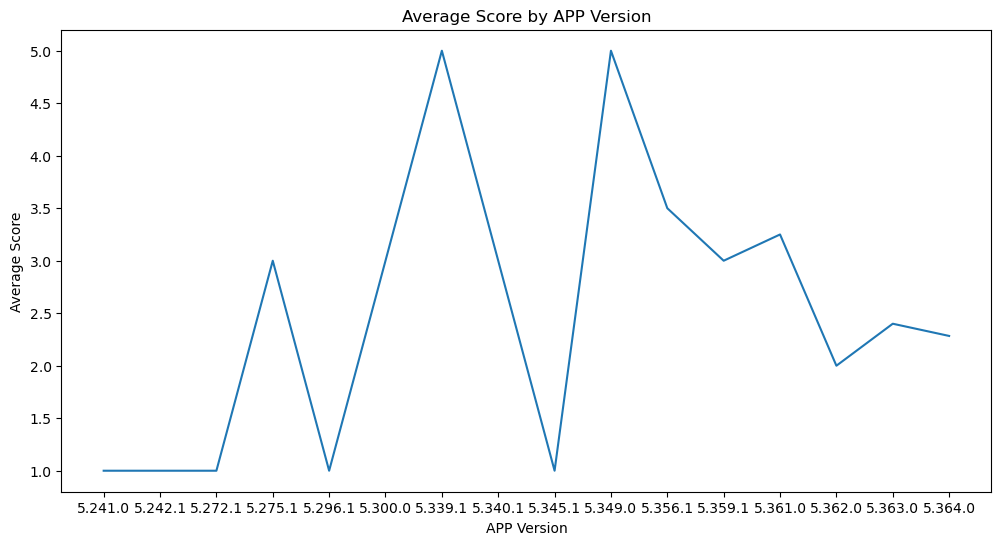

In [14]:
#Average score by app version
mean_scores = df.groupby('appVersion')['score'].mean()
plt.figure(figsize=(12, 6))
plt.plot(mean_scores.index, mean_scores.values)

plt.xlabel('APP Version')
plt.ylabel('Average Score')
plt.title('Average Score by APP Version')
plt.show()

In [15]:
df = df[['content','score']]
df.head()

,content,score
0,great date beautiful woman,5
1,waste money time scam money grab like signed p...,1
2,wow didnt get anything getting week upgraded c...,1
3,gotta pay,1
4,sometimes swipes day last week likes days some...,1


In [16]:
df['score'].value_counts()

score
1    230
5     74
2     41
3     34
4     19
Name: count, dtype: int64

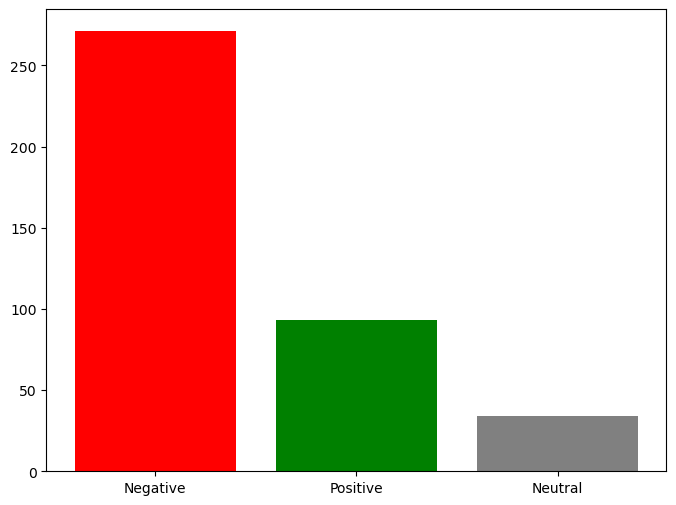

In [17]:
#Function to convert score to sentiment
df['sentiment'] = df['score'].apply(lambda x: 'Positive' if x >= 4 else ('Neutral' if x == 3 else 'Negative'))

#Plot the distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'green', 'gray'])

plt.show()

Positive words

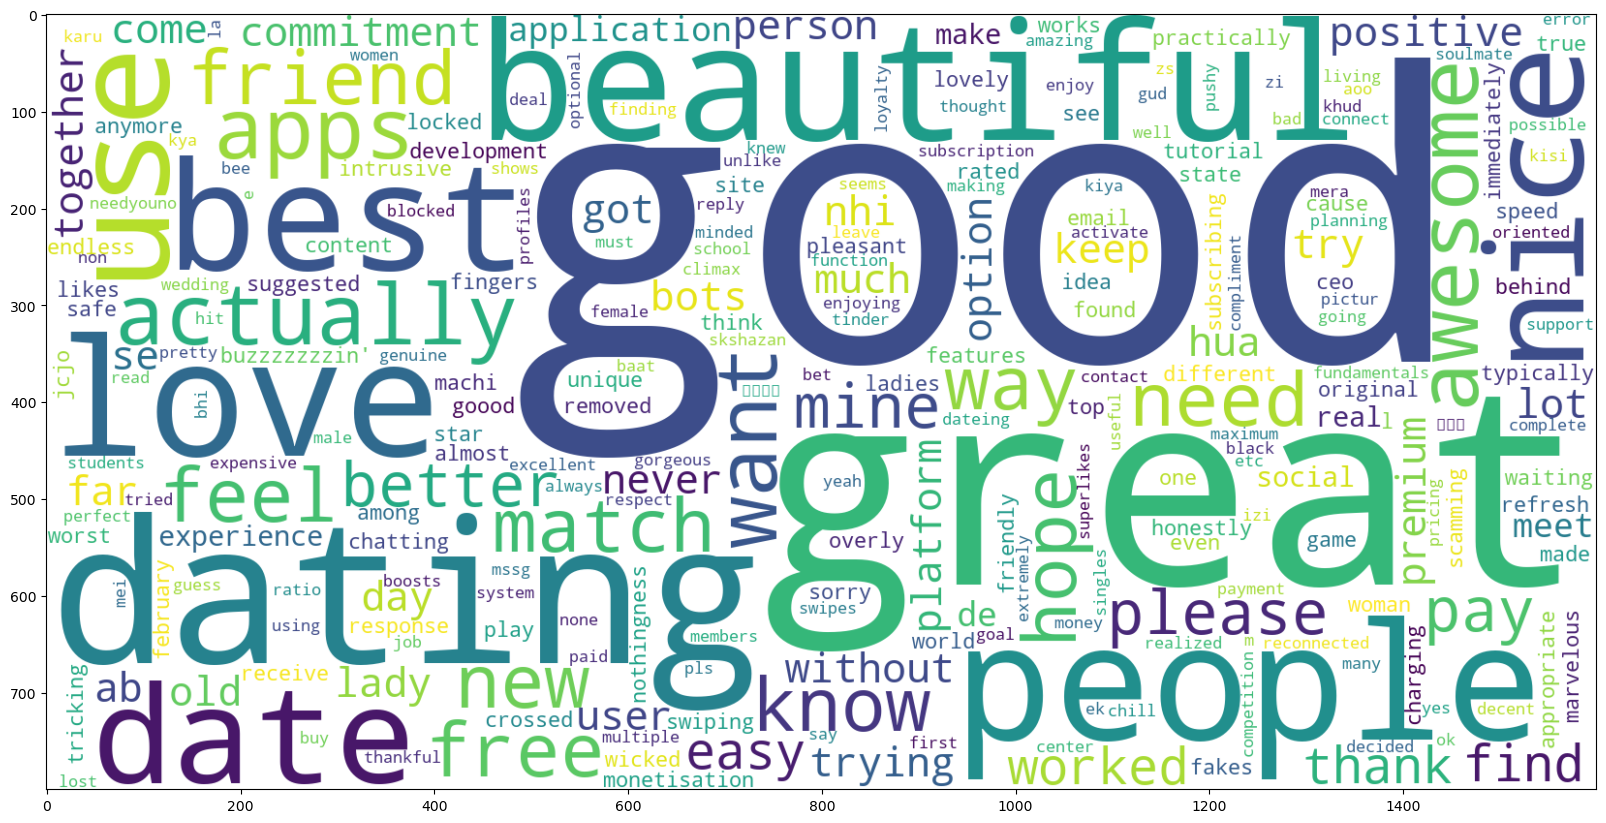

In [18]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white', max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.sentiment == 'Positive'].content))
plt.imshow(wc , interpolation = 'bilinear')

Negative words

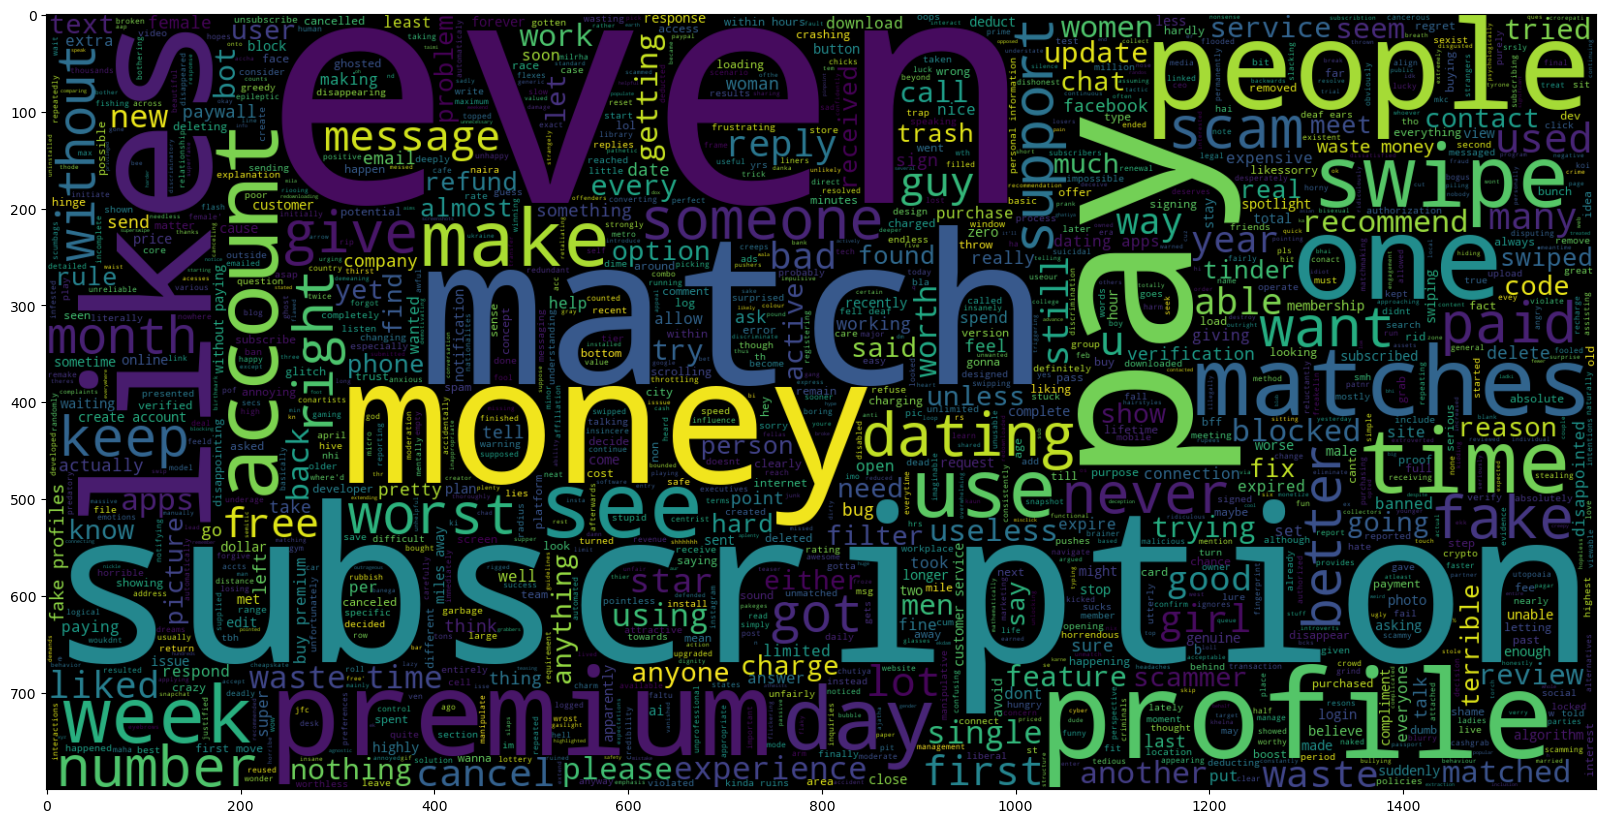

In [19]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].content))
plt.imshow(wc , interpolation = 'bilinear')

Modelling

In [20]:
#Filter out the 'neutral' sentiment
df_filtered = df[(df['sentiment'] == 'Negative') | (df['sentiment'] == 'Positive')]

X = df_filtered['content']
y = df_filtered['sentiment']

#Split Dataset into Training and Testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=66)

#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    Negative       0.81      0.97      0.88        78
    Positive       0.88      0.44      0.58        32

    accuracy                           0.82       110
   macro avg       0.84      0.71      0.73       110
weighted avg       0.83      0.82      0.80       110



LDA

In [22]:
import unicodedata
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
#spacy
import spacy
#vis
import pyLDAvis
import pyLDAvis.gensim_models

In [23]:
#Generate tokens
def generate_tokens(tweet):
    words = []
    for word in tweet.split(' '):
        if word!='':
           words.append(word)
    return words
#Store the generated tokens in a new column named 'tokens'
df['tokens'] = df.content.apply(generate_tokens)

In [24]:
#Create a dictionary
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word = create_dictionary(df['tokens'])
print(id2word)

Dictionary<1724 unique tokens: ['beautiful', 'date', 'great', 'woman', 'almost']...>


In [25]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#Pass the dataframe column having tokens and dictionary
corpus = create_document_matrix(df['tokens'],id2word)
print(df['tokens'][0])
print(corpus[0])

['great', 'date', 'beautiful', 'woman']
[(0, 1), (1, 1), (2, 1), (3, 1)]


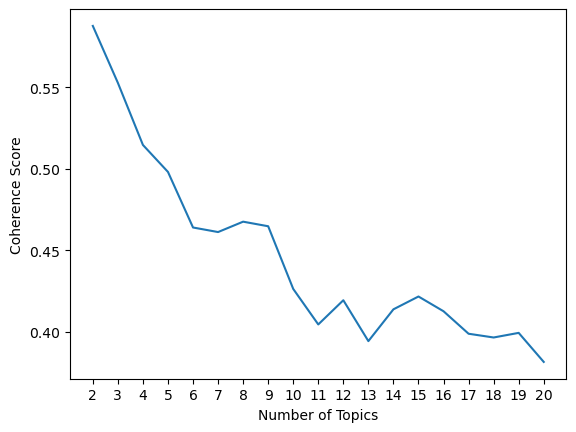

In [26]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

#Calculate coherence values
coherence_values = []
start = 2
limit = 21
step = 1

for num_topics in range(start, limit, step):
    model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100)
    coherence_model = CoherenceModel(model=model, texts=df['tokens'], dictionary=id2word, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

#Plot
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xticks(x)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")

plt.show()

In [27]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, random_state=100)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

D:\anaconda\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.006353  0.020056       1        1  53.845701
0      0.006353 -0.020056       2        1  46.154299, topic_info=        Term       Freq      Total Category  logprob  loglift
188     apps  16.000000  16.000000  Default  30.0000  30.0000
8       good  29.000000  29.000000  Default  29.0000  29.0000
40     first  21.000000  21.000000  Default  28.0000  28.0000
13      like  43.000000  43.000000  Default  27.0000  27.0000
19       one  29.000000  29.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
15     match  12.463971  37.369822   Topic2  -5.2713  -0.3248
30      time  10.594419  28.094869   Topic2  -5.4338  -0.2021
247   dating   9.818992  30.539445   Topic2  -5.5098  -0.3615
57     likes  10.139665  35.240825   Topic2  -5.4777  -0.4726
21   premium   9.612465  33.716210   Topic2  -5.5311  -0.4817

[174 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1034      1  0.860243  "recently
908       1  0.455670         ab
908       2  0.911340         ab
33        1  0.678431    account
33        2  0.316601    account
...     ...       ...        ...
84        1  0.363953      would
84        2  0.623919      would
140       1  0.171550       year
140       2  0.857751       year
244       1  0.862490          ₹

[226 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])